In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# load the data from csv files
def load_from_fragments(name):
    path = 'data/binarized_' + name + '.csv'
    data = pd.read_csv(path, index_col=0)
    return data

In [3]:
data_029b0RMT = load_from_fragments('029b0RMT')
data_117h0RMT = load_from_fragments('117h0RMT')
print(data_029b0RMT.shape)
print(data_117h0RMT.shape)

data_029b0RMT

(588, 42)
(1036, 74)


,TBAL3,TBAL4,TBAR1,TBAR2,TBAR3,TBAR4,TBPL1,TBPL2,TBPL3,TBPL4,...,TR01,TR02,TR03,TR04,TR05,TR06,TR07,TR08,TR09,TR10
TBAL3,1,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TBAL4,1,1,1,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
TBAR1,0,1,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
TBAR2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
TBAR3,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,1
TR07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
TR08,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,1,1
TR09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


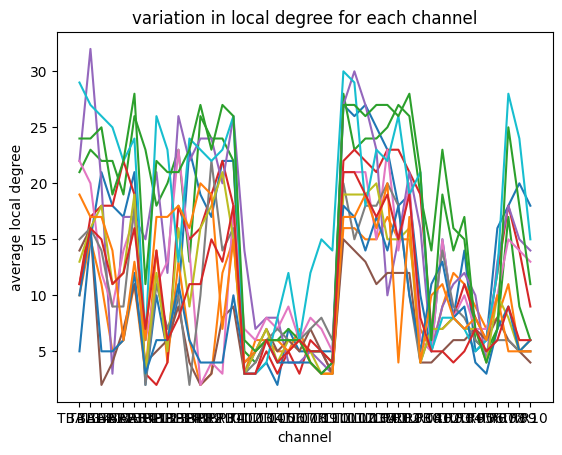

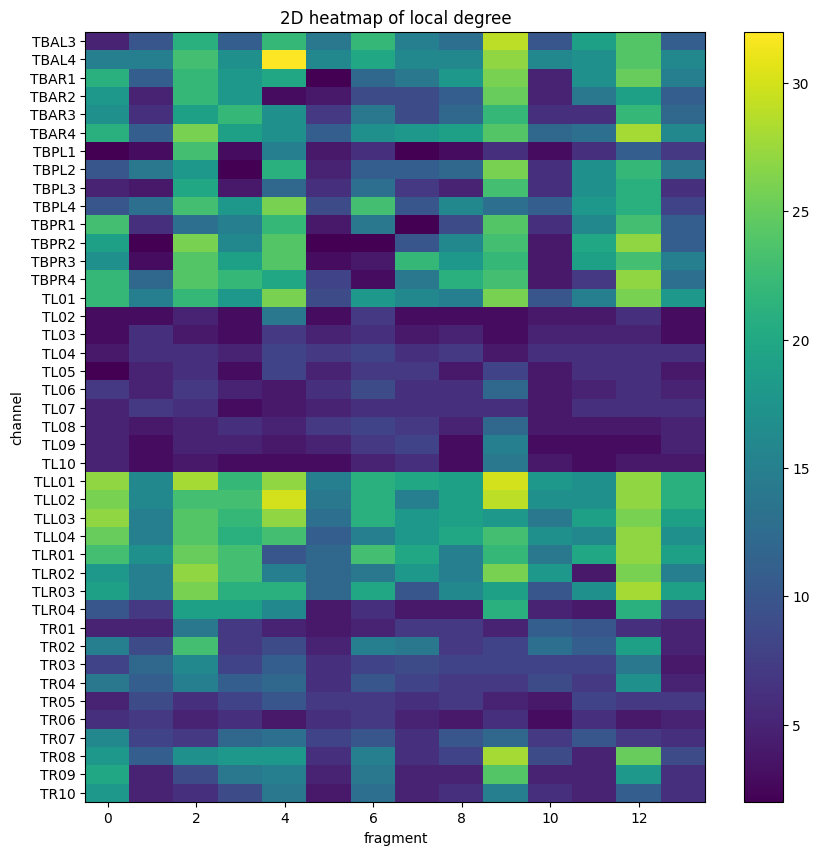

In [4]:
# part 1 : variation in local degree
def local_degree(data):
    local_degree = data.sum(axis=1)
    return local_degree

loc_deg_arr = np.zeros((int(data_029b0RMT.shape[0]/data_029b0RMT.shape[1]), data_029b0RMT.shape[1]))

num_channels = data_029b0RMT.shape[1]
# the channel names
channels = data_029b0RMT.columns
for i in range(0, data_029b0RMT.shape[0], num_channels):
    # get the local degree for each channel at each fragment
    loc_deg = local_degree(data_029b0RMT.iloc[i:i+num_channels])
    loc_deg_arr[i//num_channels] = loc_deg
    plt.plot(loc_deg)
plt.xlabel('channel')
plt.ylabel('average local degree')
plt.title('variation in local degree for each channel')
plt.show()

# plot a 2D heatmap of the local degree
plt.figure(figsize=(10,10))
plt.imshow(loc_deg_arr.transpose(), aspect='auto')
plt.colorbar()
plt.xlabel('fragment')
plt.ylabel('channel')
plt.title('2D heatmap of local degree')
plt.yticks(range(num_channels), channels)
plt.show()
    



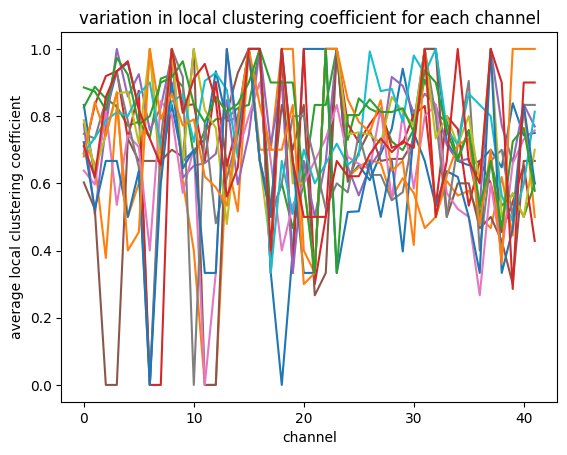

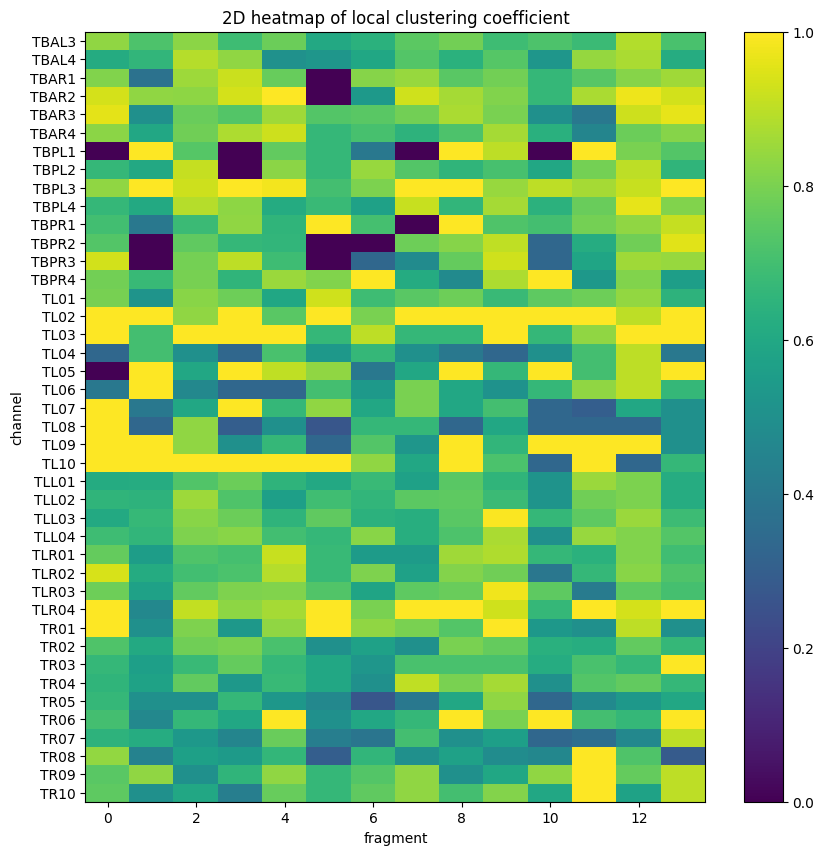

In [5]:
# local clustering coefficient using networkx
def local_clustering_coefficient(data):
    G = nx.from_pandas_adjacency(data)
    local_clustering = nx.clustering(G)
    return local_clustering

loc_clust_arr = np.zeros((int(data_029b0RMT.shape[0]/data_029b0RMT.shape[1]), data_029b0RMT.shape[1]))

num_channels = data_029b0RMT.shape[1]
channels = data_029b0RMT.columns
for i in range(0, data_029b0RMT.shape[0], num_channels):
    # get the local clustering coefficient for each channel at each fragment
    loc_clust = local_clustering_coefficient(data_029b0RMT.iloc[i:i+num_channels])
    loc_clust_arr[i//num_channels] = list(loc_clust.values())
    plt.plot(list(loc_clust.values()))
plt.xlabel('channel')
plt.ylabel('average local clustering coefficient')
plt.title('variation in local clustering coefficient for each channel')
plt.show()

# plot a 2D heatmap of the local clustering coefficient
plt.figure(figsize=(10,10))
plt.imshow(loc_clust_arr.transpose(), aspect='auto')
plt.colorbar()
plt.xlabel('fragment')
plt.ylabel('channel')
plt.title('2D heatmap of local clustering coefficient')
plt.yticks(range(num_channels), channels)
plt.show()


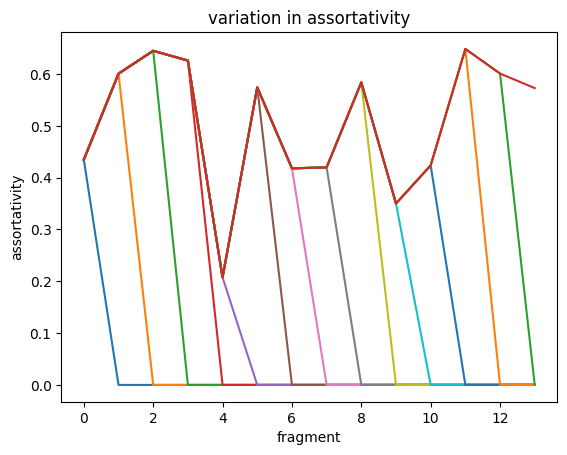

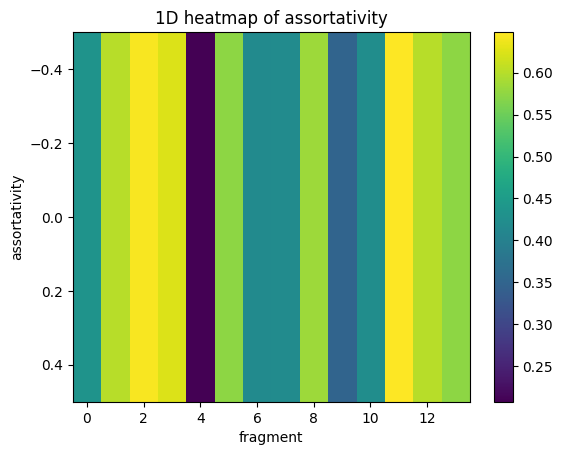

In [8]:
# assortativity using networkx
def assortativity(data):
    G = nx.from_pandas_adjacency(data)
    assortativity = nx.degree_assortativity_coefficient(G)
    return assortativity

# assortativity_arr = np.zeros((int(data_029b0RMT.shape[0]/data_029b0RMT.shape[1]), 1))
assortativity_arr = np.zeros(int(data_029b0RMT.shape[0]/data_029b0RMT.shape[1]))

num_channels = data_029b0RMT.shape[1]
channels = data_029b0RMT.columns
for i in range(0, data_029b0RMT.shape[0], num_channels):
    # get the assortativity for each fragment
    assortativity_arr[i//num_channels] = assortativity(data_029b0RMT.iloc[i:i+num_channels])
    plt.plot(assortativity_arr)
plt.xlabel('fragment')
plt.ylabel('assortativity')
plt.title('variation in assortativity')
plt.show()

# plot a 1D heatmap of the assortativity
# plt.figure(figsize=(10,10))
plt.imshow(assortativity_arr.reshape(-1,1).transpose(), aspect='auto')
plt.colorbar()
plt.xlabel('fragment')
plt.ylabel('assortativity')
plt.title('1D heatmap of assortativity')
plt.show()